In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from io import BytesIO
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
sns.set_theme(context='paper', style="whitegrid", color_codes=True)

plt.rcParams["axes.titlesize"] = 13 # default: 9
plt.rcParams["axes.labelsize"] = 13 # default: 9
plt.rcParams["legend.fontsize"] = 11 # default: 8.8
plt.rcParams["legend.title_fontsize"] = 11 # default: 8.8
plt.rcParams["xtick.labelsize"] = 11 # default: 8.8
plt.rcParams["ytick.labelsize"] = 11 # default: 8.8

## Methods

In [3]:
x_column = r'$z_0\ [\AA]$'
y_column = r'$\ln(I(z_0))\ [\ln(\mathrm{A})]$'

In [4]:
def read_vert_file(path) -> pd.DataFrame:
    """
    Read a *.VERT file from the given path.

    1. Read the file and create a list of lines, which are seperated by \r\n
    2. Extract the Title field
    3. Extract the data: Starting 2 lines after a line named "DATA"
    4. Convert data into DataFrame
    """
    # read
    with open(path, 'rb') as io:
        txt = io.read()
    txt = txt.split(b'\r\n')

    # extract title
    for line in txt:
        if line.startswith(b'Titel'):
            title = line.split(b'=')[1]
            break

    # extract data
    for index, line in enumerate(txt):
        if b'\nDATA' in line:
            data = txt[index+2:] # data start 2 lines after the found line
            break
    
    # convert to df
    with BytesIO(b'\n'.join(data)) as io:
        df = pd.read_csv(io, sep='\t', index_col=0, header=None)

    df.attrs['title'] = os.path.basename(path)
    df = df.drop(columns=4)
    df = df.rename(columns={
        1: 'U [V]',
        2: x_column,
        3: '$I(z_0)$'
    })
    df[y_column] = np.log(df['$I(z_0)$'])

    return df

In [5]:
def plot(data, title=None, filename=None):
    data = data.copy()
    img = sns.relplot(
        data=data,
        x=x_column,
        y=y_column
    )
    if title is not None:
        plt.title(title)
    else:
        plt.title(data.attrs['title'])
    if filename is not None:
        img.figure.savefig(filename, bbox_inches='tight')

In [6]:
def read_files(folder):
    data = {}
    for dirpath, dirnames, filenames in os.walk(folder):
        for f in filenames:
            filename = f"{dirpath}/{f}"
            print('read file: ', filename)
            df = read_vert_file(filename)
            data[df.attrs['title']] = df
    return data

In [7]:
def regression(df):
    result = linregress(
        x=df[x_column],
        y=df[y_column]
    )
    print(f"$m = {round(result.slope*1000, 2)} \\pm {round(result.stderr*1000, 2)}$")
    
    x_values = np.linspace(df[x_column].min(), df[x_column].max())
    fig = plt.errorbar(
        x_values,
        result.slope * x_values + result.intercept,
        yerr=np.abs(result.stderr * x_values + result.intercept_stderr)
    )

    return result.slope*1000, result.stderr*1000

# A

### Messwerte

In [8]:
data = read_files('a')

read file:  a/A231128.133315.VERT
read file:  a/A231128.133424.VERT
read file:  a/A231128.134137.VERT
read file:  a/A231128.134156.VERT
read file:  a/A231128.134230.VERT
read file:  a/A231128.134345.VERT
read file:  a/A231128.134401.VERT
read file:  a/A231128.134418.VERT
read file:  a/A231128.134446.VERT


In [9]:
# # Plotte alle Messungen
# for i, key in enumerate(data.keys()):
#     plot(data[key], title=f"{i}: {key}")

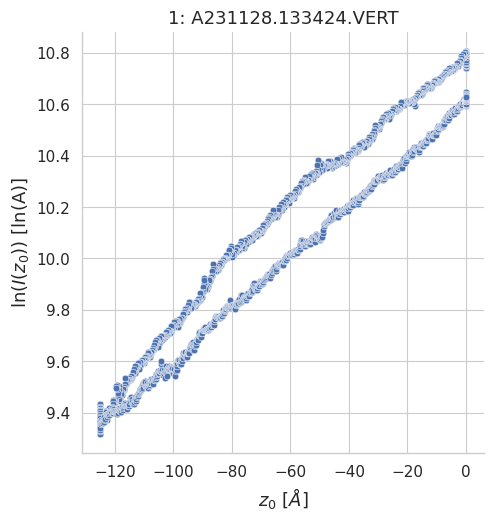

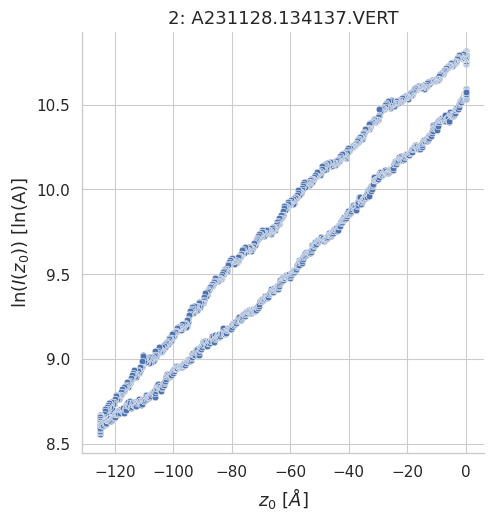

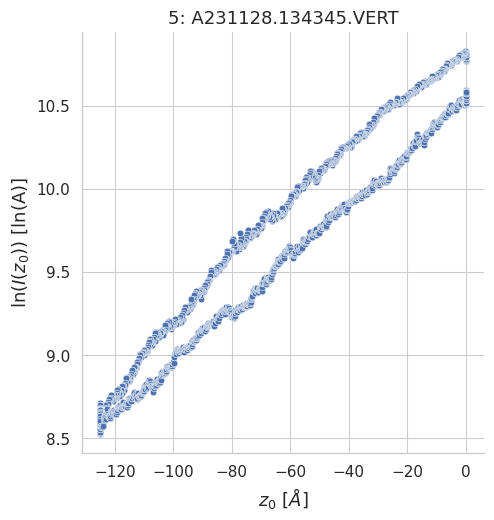

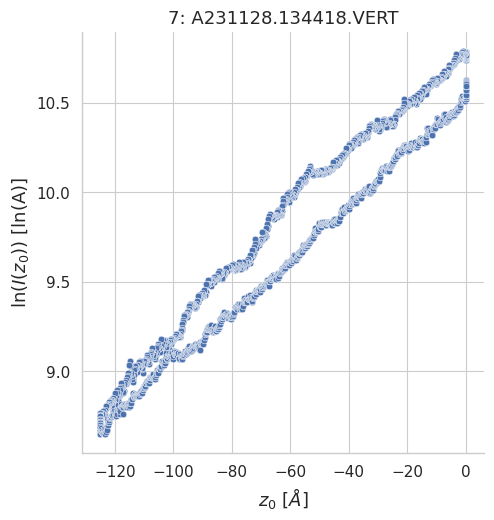

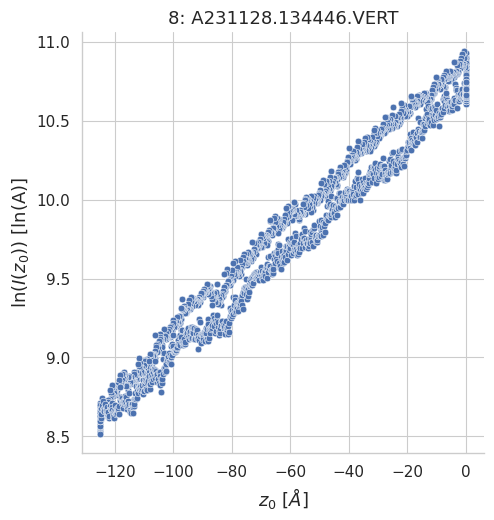

In [10]:
# Plotte die 5 besten Messungen
selected_measurements_a = []
for i, key in enumerate(data.keys()):
    if i in (2, 5, 1, 7, 8):
        selected_measurements_a.append(data[key])
        plot(data[key], title=f"{i}: {key}")

### Regression

$m = 10.55 \pm 0.05$
$m = 16.58 \pm 0.08$
$m = 16.46 \pm 0.08$
$m = 15.58 \pm 0.07$
$m = 17.18 \pm 0.05$


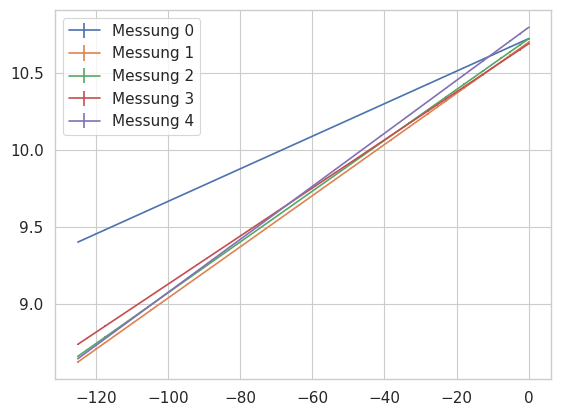

In [11]:
for df in selected_measurements_a:
    regression(df)
plt.legend([ f"Messung {i}" for i in range(5)])

# B

### Messwerte

In [12]:
data = read_files('b')

read file:  b/A231128.134613.VERT
read file:  b/A231128.134739.VERT
read file:  b/A231128.134817.VERT
read file:  b/A231128.134842.VERT
read file:  b/A231128.134923.VERT
read file:  b/A231128.134937.VERT
read file:  b/A231128.134951.VERT
read file:  b/A231128.135005.VERT
read file:  b/A231128.135041.VERT


In [13]:
# # Plotte alle Messungen
# for i, key in enumerate(data.keys()):
#     plot(data[key], title=f"{i}: {key}")

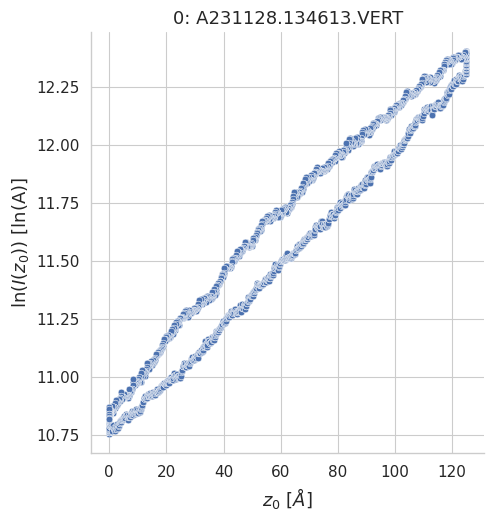

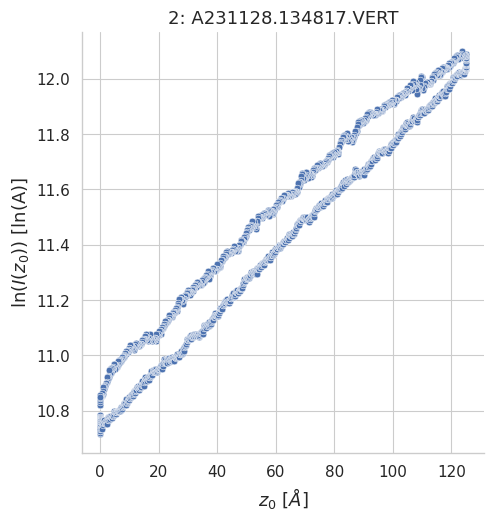

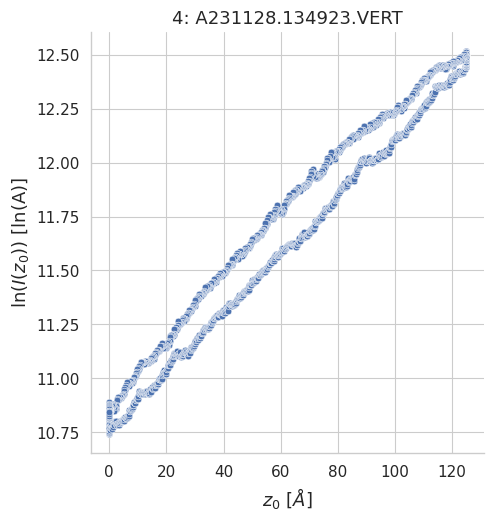

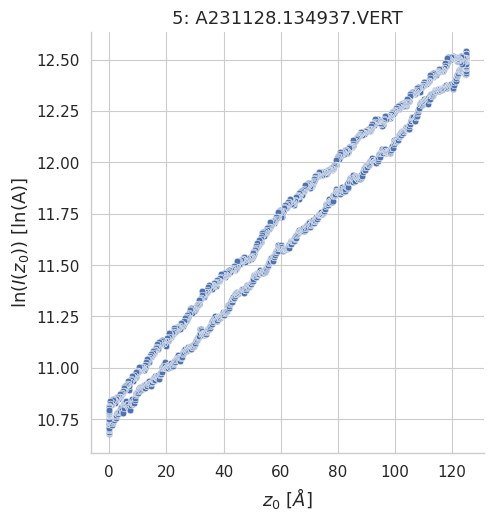

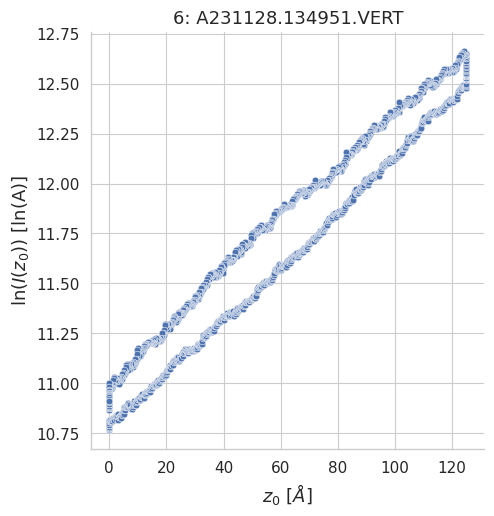

In [14]:
# Plotte die 5 besten Messungen
selected_measurements_b = []
for i, key in enumerate(data.keys()):
    if i in (2, 4, 5, 6, 0):
        selected_measurements_b.append(data[key])
        plot(data[key], title=f"{i}: {key}")

### Regression

In [15]:
# plotte alle Regressionen
# for df in selected_measurements_a:
#     plot_regression(df)

$m = 12.44 \pm 0.05$
$m = 10.12 \pm 0.04$
$m = 13.42 \pm 0.04$
$m = 13.94 \pm 0.04$
$m = 13.53 \pm 0.06$


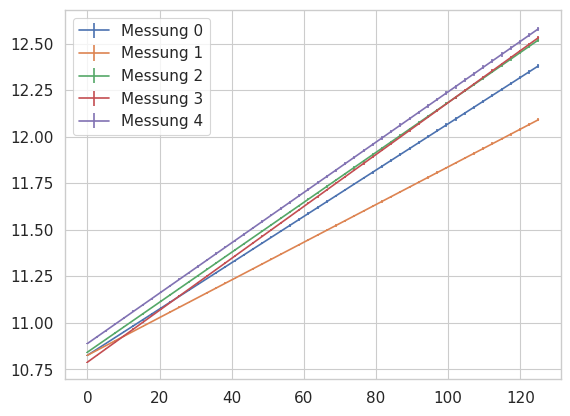

In [16]:
for df in selected_measurements_b:
    regression(df)
plt.legend([ f"Messung {i}" for i in range(5)])

# A und B

$m = 10.55 \pm 0.05$
$m = 16.58 \pm 0.08$
$m = 16.46 \pm 0.08$
$m = 15.58 \pm 0.07$
$m = 17.18 \pm 0.05$
$m = 12.44 \pm 0.05$
$m = 10.12 \pm 0.04$
$m = 13.42 \pm 0.04$
$m = 13.94 \pm 0.04$
$m = 13.53 \pm 0.06$


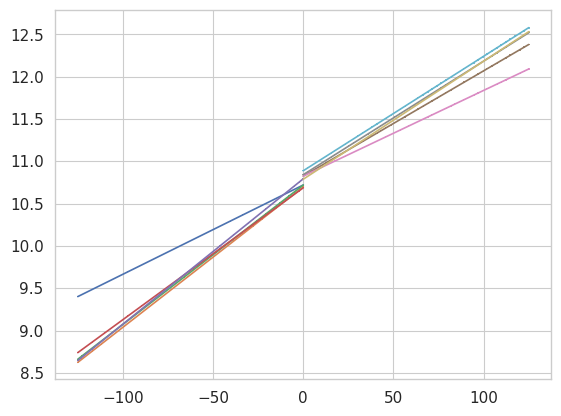

In [17]:
ms = []
errs = []
for df in selected_measurements_a + selected_measurements_b:
    m, err = regression(df)
    ms.append(m)
    errs.append(err)

In [18]:
for i in range(10):
    phi = (1000*ms[i])**2/1e6
    err_phi = (1000*errs[i])**2/1e6
    print(f'| ${round(ms[i], 3)} \\pm {round(errs[i], 3)}$ | ${round(phi, 3)} \\pm {round(err_phi, 3)}$ |')

| $10.549 \pm 0.049$ | $111.29 \pm 0.002$ |
| $16.579 \pm 0.079$ | $274.872 \pm 0.006$ |
| $16.464 \pm 0.078$ | $271.057 \pm 0.006$ |
| $15.579 \pm 0.065$ | $242.699 \pm 0.004$ |
| $17.176 \pm 0.054$ | $295.018 \pm 0.003$ |
| $12.439 \pm 0.048$ | $154.737 \pm 0.002$ |
| $10.123 \pm 0.038$ | $102.478 \pm 0.001$ |
| $13.417 \pm 0.043$ | $180.009 \pm 0.002$ |
| $13.945 \pm 0.038$ | $194.458 \pm 0.001$ |
| $13.526 \pm 0.057$ | $182.949 \pm 0.003$ |
